In [2]:
import nltk

nltk.download("vader_lexicon")

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jersey/nltk_data...


In [5]:
sent = "I am very happy today"
sent_analyzer.polarity_scores(sent)

{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'compound': 0.6115}

In [20]:
import pandas as pd

df = pd.read_csv("posts_processed.csv")
df.head()

,id,created_date,contents,score,author,created_utc,url,full_link,title,selftext,upvote_ratio,num_comments
0,u4l4w9,2022-04-16,trying to help,1,FBXX,1650066815,https://i.redd.it/zll5euca6st81.jpg,https://www.reddit.com/r/Eldenring/comments/u4...,trying to help,NaN,1.0,0
1,u4l4hi,2022-04-16,"I mean, Lightning Ram is just superior :P It's...",1,x3mSlayer,1650066778,https://youtu.be/oRlqk432xtw,https://www.reddit.com/r/Eldenring/comments/u4...,"I mean, Lightning Ram is just superior :P It's...",NaN,1.0,0
2,u4l4h0,2022-04-16,This sub is cringe. [removed],1,StrawmanRedditard,1650066778,https://www.reddit.com/r/Eldenring/comments/u4...,https://www.reddit.com/r/Eldenring/comments/u4...,This sub is cringe.,[removed],1.0,0
3,u4l4e7,2022-04-16,"Okay, not bad but… let me show you how this wo...",1,Blondy93ttv,1650066771,https://v.redd.it/f2s12eqx5st81,https://www.reddit.com/r/Eldenring/comments/u4...,"Okay, not bad but… let me show you how this wo...",NaN,1.0,0
4,u4l4dd,2022-04-16,Let’s take a poll... Should we ban “Let me Sol...,1,Eulenna,1650066769,https://www.reddit.com/r/Eldenring/comments/u4...,https://www.reddit.com/r/Eldenring/comments/u4...,Let’s take a poll...,Should we ban “Let me Solo her posts”\n\n[View...,1.0,0


In [21]:
df["sentiment"] = df["contents"].apply(lambda x: sent_analyzer.polarity_scores(x)["compound"])
df.head()

,id,created_date,contents,score,author,created_utc,url,full_link,title,selftext,upvote_ratio,num_comments,sentiment
0,u4l4w9,2022-04-16,trying to help,1,FBXX,1650066815,https://i.redd.it/zll5euca6st81.jpg,https://www.reddit.com/r/Eldenring/comments/u4...,trying to help,NaN,1.0,0,0.4019
1,u4l4hi,2022-04-16,"I mean, Lightning Ram is just superior :P It's...",1,x3mSlayer,1650066778,https://youtu.be/oRlqk432xtw,https://www.reddit.com/r/Eldenring/comments/u4...,"I mean, Lightning Ram is just superior :P It's...",NaN,1.0,0,0.7672
2,u4l4h0,2022-04-16,This sub is cringe. [removed],1,StrawmanRedditard,1650066778,https://www.reddit.com/r/Eldenring/comments/u4...,https://www.reddit.com/r/Eldenring/comments/u4...,This sub is cringe.,[removed],1.0,0,0.0000
3,u4l4e7,2022-04-16,"Okay, not bad but… let me show you how this wo...",1,Blondy93ttv,1650066771,https://v.redd.it/f2s12eqx5st81,https://www.reddit.com/r/Eldenring/comments/u4...,"Okay, not bad but… let me show you how this wo...",NaN,1.0,0,0.7684
4,u4l4dd,2022-04-16,Let’s take a poll... Should we ban “Let me Sol...,1,Eulenna,1650066769,https://www.reddit.com/r/Eldenring/comments/u4...,https://www.reddit.com/r/Eldenring/comments/u4...,Let’s take a poll...,Should we ban “Let me Solo her posts”\n\n[View...,1.0,0,-0.5574


In [24]:
df.query("'created_date'=='2020-04-23'").plot(y="sentiment", figsize=(16, 4))

KeyError: 'False: boolean label can not be used without a boolean index'

In [25]:
import seaborn as sns

<AxesSubplot:xlabel='created_date', ylabel='sentiment'>

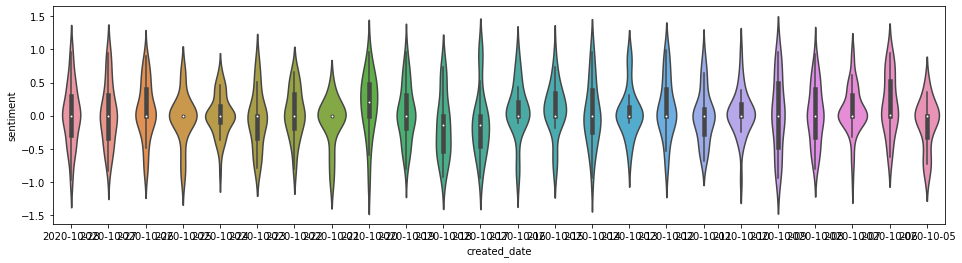

In [72]:
sample = df.query("created_date >= '2020-10-05' and created_date <= '2020-10-28'")

fig, ax = plt.subplots(figsize=(16, 4))
sns.violinplot(y="sentiment", x="created_date", data=sample)
sns.

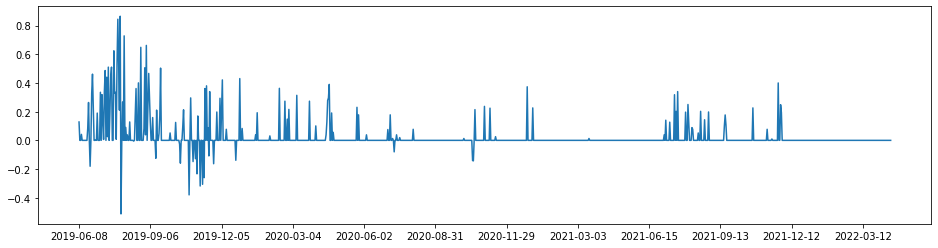

In [48]:
# plot of median of sentiment over time

from statistics import median
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(16, 4))

median_sentiment_through_days = pd.DataFrame(df.groupby("created_date").agg({"sentiment": median}))
median_sentiment_through_days.head()

ax.plot(median_sentiment_through_days.index, median_sentiment_through_days["sentiment"])

ax.xaxis.set_major_locator(ticker.MultipleLocator(90))

In [64]:
def pos_neg(sentiment):
    if sentiment > 0:
        return "positive"
    elif sentiment < 0:
        return "negative"
    else:
        return "neutral"

df["valence"] = df.sentiment.apply(pos_neg)
df.head()

,id,created_date,contents,score,author,created_utc,url,full_link,title,selftext,upvote_ratio,num_comments,sentiment,valence
0,u4l4w9,2022-04-16,trying to help,1,FBXX,1650066815,https://i.redd.it/zll5euca6st81.jpg,https://www.reddit.com/r/Eldenring/comments/u4...,trying to help,NaN,1.0,0,0.4019,positive
1,u4l4hi,2022-04-16,"I mean, Lightning Ram is just superior :P It's...",1,x3mSlayer,1650066778,https://youtu.be/oRlqk432xtw,https://www.reddit.com/r/Eldenring/comments/u4...,"I mean, Lightning Ram is just superior :P It's...",NaN,1.0,0,0.7672,positive
2,u4l4h0,2022-04-16,This sub is cringe. [removed],1,StrawmanRedditard,1650066778,https://www.reddit.com/r/Eldenring/comments/u4...,https://www.reddit.com/r/Eldenring/comments/u4...,This sub is cringe.,[removed],1.0,0,0.0000,neutral
3,u4l4e7,2022-04-16,"Okay, not bad but… let me show you how this wo...",1,Blondy93ttv,1650066771,https://v.redd.it/f2s12eqx5st81,https://www.reddit.com/r/Eldenring/comments/u4...,"Okay, not bad but… let me show you how this wo...",NaN,1.0,0,0.7684,positive
4,u4l4dd,2022-04-16,Let’s take a poll... Should we ban “Let me Sol...,1,Eulenna,1650066769,https://www.reddit.com/r/Eldenring/comments/u4...,https://www.reddit.com/r/Eldenring/comments/u4...,Let’s take a poll...,Should we ban “Let me Solo her posts”\n\n[View...,1.0,0,-0.5574,negative


In [68]:
# df.groupby("created_date").agg({"valence": "count"}).plot(figsize=(16, 4))

valence = df.pivot_table(index="created_date", columns="valence", values="id", aggfunc="count")
valence.head()
# sns.barplot(y="valence", x="created_date", data=valence, color="valence")

valence,negative,neutral,positive
created_date,,,
2019-06-08,8.0,18.0,29.0
2019-06-09,3.0,15.0,9.0
2019-06-10,26.0,48.0,59.0
2019-06-11,15.0,14.0,31.0
2019-06-12,8.0,27.0,20.0


In [62]:
sent = 'Starscourge Radahn I just got to this boss fight and I’ve been able to get to phase 2 but I was just wondering if you can summon irl players for this battle if so it would help a lot'
sent_analyzer.polarity_scores(sent)
sent_analyzer.sentiment_valence(sent)

TypeError: SentimentIntensityAnalyzer.sentiment_valence() missing 4 required positional arguments: 'sentitext', 'item', 'i', and 'sentiments'

In [58]:
negs[0]

KeyError: 0